### Домашнее задание "Случайные марковские процессы"
#### Преподаватель: Даниил Корбут, Наталья Баданина, Александр Миленькин
##### 1. Скачайте текст войны и мир (ссылка на github и гугл диск).
* Очистите его, оставив только русские буквы и символы пробела.
* Постройте матрицу переходных вероятностей.
* Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;
* Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов.
##### 2. Выберите ряд и оцените его через HMM.
* Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.


In [135]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [9]:
a = ord('а')
RUS = ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6,a+32)]).upper()
RUS += ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6,a+32)])
RUS

'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдеёжзийклмнопрстуфхцчшщъыьэюя'

In [149]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text1 = f.read()
with open('tom_2.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()
text += text2
with open('tom_3.txt', 'r', encoding='utf-8') as f:
    text3 = f.read()
with open('tom_4.txt', 'r', encoding='utf-8') as f:
    text4 = f.read()
text =   text1 +  text2 + text3 + text4      
text = re.sub('[^А-Яа-я]',' ', text)
# text = re.sub('[\s]*',' ', text)
text[-1000:]

'тобы отказаться от непосредственного чувства неподвижности земли и такого же чувства движения планет  так и для истории трудность признания подчиненности личности законам пространства  времени и причин состоит в том  чтобы отказаться от непосредственного чувства независимости своей личности  Но  как в астрономии новое воззрение говорило   Правда  мы не чувствуем движения земли  но  допустив ее неподвижность  мы приходим к бессмыслице  допустив же движение  которого мы не чувствуем  мы приходим к законам     так и в истории новое воззрение говорит   И правда  мы не чувствуем нашей зависимости  но  допустив нашу свободу  мы приходим к бессмыслице  допустив же свою зависимость от внешнего мира  времени и причин  приходим к законам    В первом случае надо было отказаться от сознания несуществующей неподвижности в пространстве и признать неощущаемое нами движение  в настоящем случае   точно так же необходимо отказаться от несуществующей свободы и признать неощущаемую нами зависимость      

In [150]:
POS = {l: i for i, l in enumerate(RUS)}

In [153]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [154]:
for cp, cn in zip(text[:-1], text[1:]):
    if cp == ' ' or cn == ' ':
        continue
    else:       
        probabilities[POS[cp], POS[cn]] += 1

In [155]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [156]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

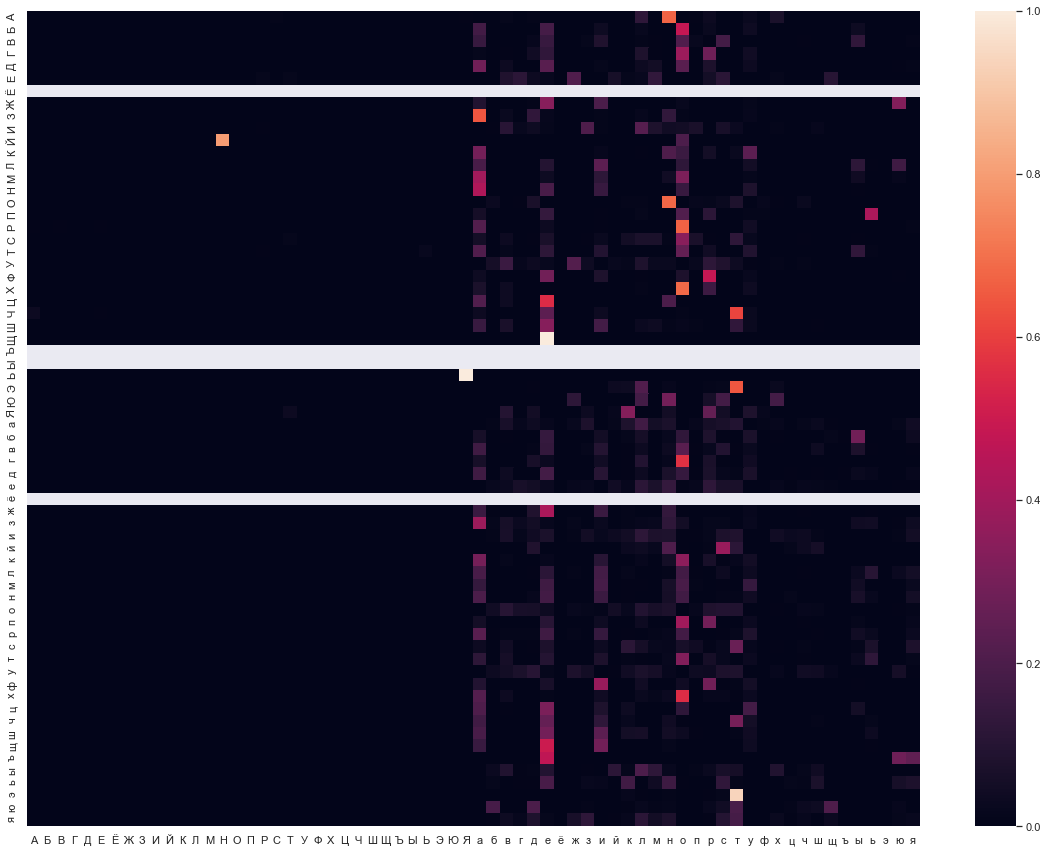

In [157]:
plt.figure(figsize=(20,15))
sns.heatmap(df)
plt.show()

##### Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;

In [158]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
for c in RUS:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['п', c, 'р']), proba)

пар 4.3092696207834994e-05
пгр 3.7616030177462723e-07
пер 0.0002008992496048479
пир 7.288952451775456e-06
пкр 3.3136966057716635e-06
пмр 6.76710246315884e-10
пнр 6.338286507372365e-08
пор 0.0005070193966519395
ппр 8.75908723710891e-06
прр 1.705289821386356e-06
пср 2.4657901421924746e-08
птр 1.8073871222449788e-06
пур 1.561893408318333e-05
пфр 1.5932432605066755e-07
пчр 9.319398626034817e-08
пшр 6.300285446749222e-10
пщр 1.2143599997401465e-09
пыр 4.653054439000497e-06
пэр 2.5654008719747318e-09
пяр 1.3771081848320815e-06


##### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [163]:
s = ['Б']
start = np.random.choice(list(RUS))
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

Бдоодррегл


In [ ]:
2. Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [165]:
from hmmlearn.hmm import GaussianHMM

In [166]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")["Close"]

In [167]:
values = series.values.reshape(-1,1)

In [213]:
for n in range(1, 12):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620569
3 -786.8375332667733
4 -752.0201472668955
5 -737.1181370072982
6 -729.5671112589449
7 -713.7233991717004
8 -702.1057754508194
9 -690.983806820966
10 -691.2666968907417
11 -682.2299553012381


Fitting a model with 1679 free scalar parameters with only 162 data points will result in a degenerate solution.


<function matplotlib.pyplot.legend(*args, **kwargs)>

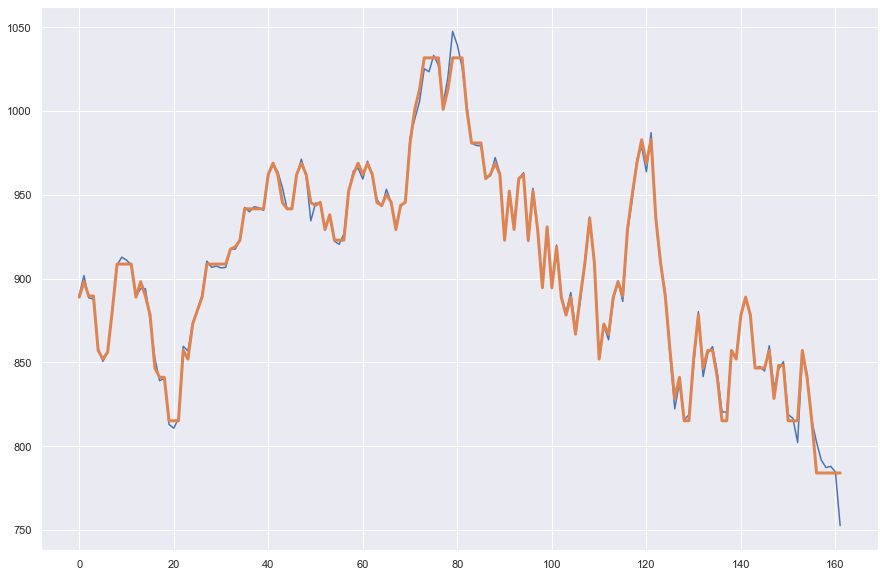

In [220]:
model = GaussianHMM(n_components=40,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(15, 10))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.legend

In [218]:
model.transmat_.shape

(40, 40)